In [14]:
import numpy as np
import matplotlib.pyplot as plt
datos=numpy.load('fit_exercise.npy')

[[ 0.59677897  0.9210494   1.15618395  1.75451756  1.8249173   2.26851454
   2.28263231  2.50455365  2.86139335  2.93714046  3.12261223  3.17285482
   3.22958914  3.43178016  3.61788656  3.92117518  3.98044255  4.14826212
   4.2310646   4.2583029   4.26351307  4.30862763  4.33701173  4.38572245
   4.80931901  4.83034264  4.93685098  5.01836676  5.19485119  5.31551374
   5.31827587  5.51314769  6.11023511  6.12894526  6.23952952  6.30976124
   6.34400959  6.84829739  6.96469186  7.1946897   7.22443383  7.24455325
   7.29049707  7.37995406  8.49431794  8.66309158  8.93389163  9.44160018
   9.80764198  9.85559786]
 [ 8.11257148  3.52815075  4.81023356  0.89238164  3.13295195  3.53338034
   1.89933975  2.83896349  0.89713921  0.9500022   1.45700044  1.05318568
   1.71011605  0.06780647  0.40019114  1.00444563 -0.02239716  0.35714018
   0.36639252 -0.20377166  0.4535501  -0.05481938  0.11108328  0.05408497
  -0.4312348   0.03066613  0.04872262 -0.60437665 -0.92605578 -1.43906426
   0.057997

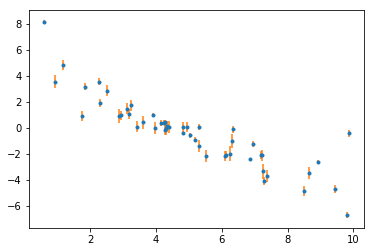

In [15]:
print(datos)
plt.plot(datos[0,:], datos[1,:], 'o', label='Original data', markersize=3)
plt.errorbar(datos[0,:], datos[1,:],yerr= datos[2,:],ls='')
plt.show()
A = numpy.vstack([datos[0,:], numpy.ones(len(datos[0,:]))]).T

# Ajuste por mínimos cuadrados 

In [16]:
m, c = np.linalg.lstsq(A, datos[1,:])[0]
print(m, c)

-0.9821623517930431 4.577859303753363


c:\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


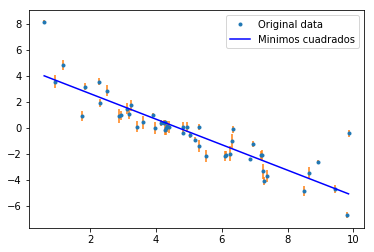

In [29]:
plt.plot(datos[0,:], datos[1,:], 'o', label='Datos', markersize=3)
plt.errorbar(datos[0,:], datos[1,:],yerr= datos[2,:],ls='')
plt.plot(datos[0,:], m*datos[0,:] + c, 'b', label='Minimos cuadrados')
plt.legend()
plt.show()

# Ajuste por Chi cuadrada

In [18]:
#obtenemos el numero total de datos n
n=len(datos[0,:])
print(n)
#obtenemos la media de los X
x_mean=np.mean(datos[0,:])
#obtenemos la suma total de cada Xi elevado al cuadrado
sq= datos[0,:]*datos[0,:]
x2_sum=sq.sum()
#obtenemos la suma de multimpliacar cada elemento Xi con cada Yi
sq2=datos[0,:]*datos[1,:]
xy_sum=sq2.sum()
#la media de los valores de Y
y_mean=np.mean(datos[1,:])

c2= ((y_mean* x2_sum)- (x_mean * xy_sum) )/(x2_sum - (n*(x_mean)**2))
print(c2,c)

m2= (xy_sum -n*y_mean*x_mean)/(x2_sum - n*(x_mean**2))
print(m,m2)

50
4.577859303753355 4.577859303753363
-0.9821623517930431 -0.9821623517930416


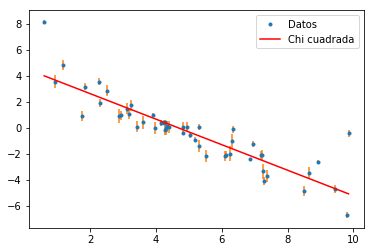

In [33]:
plt.plot(datos[0,:], datos[1,:], 'o', label='Datos', markersize=3)
plt.errorbar(datos[0,:], datos[1,:],yerr= datos[2,:],ls='')
plt.plot(datos[0,:], m2*datos[0,:] + c2, 'r', label='Chi cuadrada')
plt.legend()
plt.show()

# Comparación de los dos ajustes

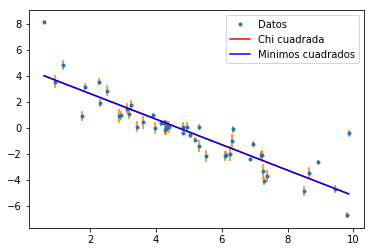

In [32]:
plt.plot(datos[0,:], datos[1,:], 'o', label='Datos', markersize=3)
plt.errorbar(datos[0,:], datos[1,:],yerr= datos[2,:],ls='')
plt.plot(datos[0,:], m2*datos[0,:] + c2, 'r', label='Chi cuadrada')
plt.plot(datos[0,:], m*datos[0,:] + c, 'b', label='Minimos cuadrados')
plt.legend()
plt.show()